# Conjunto de dados para classificação da qualidade de vinho

## Definição do Problema

O conjunto de dados da qualidade de vinho <https://archive.ics.uci.edu/ml/datasets/wine+quality> consiste na predição da qualidade de vinhos brancos sobre uma escala dada medições químicas de cada vinho.

Trata-se de um problema de classificação multi-classe, mas pode ser também formulado como um problema de regressão. O número de observações para cada classe não é balanceado. Existem 4,898 observações com 11 variáveis de entrada e uma variável de saída. Os nomes das variáveis são as seguintes:

1. Acidez fixa.
2. Acidez volátil.
3. Ácido cítrico.
4. Resíduos de açúcar.
5. Cloretos.
6. Dióxido de enxofre livre.
7. Dióxido de enxofre total.
8. Densidade.
9. pH.
10. Sulfatos.
11. Ácool.
12. Qualidade (nota entre 0 e 10).

Atributo de predição: Classe da qualidade de vinho

### Importação das bibliotecas

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

### Carregando e definindo as colunas do dataset

In [18]:
data = pd.read_csv('winequality-white.csv',header=0, sep=';')

### Visualização e descrição dos dados

In [19]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [20]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [21]:
print(data.shape)

(4898, 12)


In [22]:
print(data.groupby('quality').size())

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


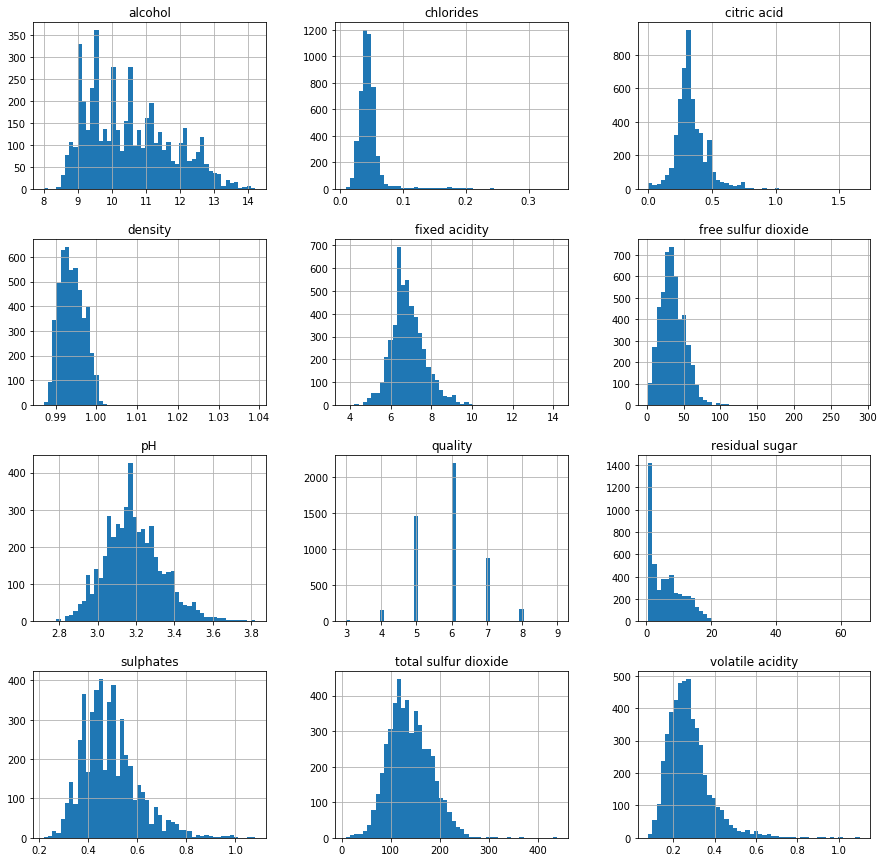

In [23]:
data.hist(figsize=(15,15), bins=50);

In [24]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


### Criação do dataset de validação 

In [25]:
dataset = data.values
print(dataset)

[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]


In [26]:
np.random.seed(1)
np.random.shuffle(dataset)
dataset

array([[ 6.2 ,  0.38,  0.18, ...,  0.71,  9.2 ,  4.  ],
       [ 6.4 ,  0.25,  0.74, ...,  0.42,  9.2 ,  6.  ],
       [ 6.4 ,  0.25,  0.37, ...,  0.4 , 11.1 ,  7.  ],
       ...,
       [ 8.4 ,  0.19,  0.42, ...,  0.65, 11.1 ,  4.  ],
       [ 6.1 ,  0.22,  0.25, ...,  0.4 , 10.7 ,  5.  ],
       [ 7.2 ,  0.23,  0.38, ...,  0.44,  9.  ,  6.  ]])

In [27]:
X = dataset[:,:11]
y = dataset[:,11]

In [28]:
n_train = int(round(len(y) * 0.75))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

In [29]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4898, 11), (4898,), (3674, 11), (3674,), (1224, 11), (1224,))

### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [30]:
resultados = {}
resultados['DTC'] = { 'model': tree.DecisionTreeClassifier() }
resultados['SVC'] = { 'model': svm.SVC() }
resultados['KNN'] = { 'model': neighbors.KNeighborsClassifier() }
resultados['LOR'] = { 'model': linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg') }
resultados['NB'] = { 'model':  naive_bayes.GaussianNB() }
resultados['SGD'] = { 'model': linear_model.SGDClassifier() }
resultados['RF'] = { 'model': ensemble.RandomForestClassifier() }
resultados['GB'] = { 'model': ensemble.GradientBoostingClassifier() }

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [31]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['accuracy'] = metrics.accuracy_score(y_test, resultados[key]['y_pred'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [32]:
df = pd.DataFrame(resultados)
df.T[['accuracy','y_pred']]

,accuracy,y_pred
DTC,0.609477,"[6.0, 6.0, 7.0, 5.0, 5.0, 6.0, 6.0, 6.0, 5.0, ..."
GB,0.581699,"[5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, ..."
KNN,0.45098,"[6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, ..."
LOR,0.535131,"[6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, ..."
NB,0.415033,"[6.0, 4.0, 7.0, 7.0, 5.0, 7.0, 7.0, 6.0, 5.0, ..."
RF,0.636438,"[6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 5.0, ..."
SGD,0.320261,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 5.0, ..."
SVC,0.54902,"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, ..."


In [33]:
df_T = df.transpose()
df_T = df_T[ ['accuracy'] ]
df_T

,accuracy
DTC,0.609477
GB,0.581699
KNN,0.45098
LOR,0.535131
NB,0.415033
RF,0.636438
SGD,0.320261
SVC,0.54902


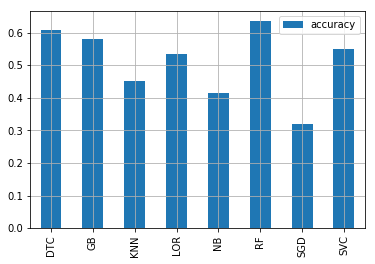

In [34]:
df_T.plot(kind='bar', grid=True);